## Lecture Note 4 수정사항

In [1]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from scipy.stats import logistic

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

### sm package: sm.Logit(y,x) 
### sklearn package: LogisticRegression().fit(x,y) 

In [2]:
file1="c:/temp100/credit_LN4.csv"
credit=pd.read_csv(file1)
credit

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [4]:
y=credit['default']
y=pd.get_dummies(y)
y=y['Yes']
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Yes, Length: 10000, dtype: uint8

In [5]:
x=credit['balance']
X=sm.add_constant(x)
X

,const,balance
0,1.0,729.526495
1,1.0,817.180407
2,1.0,1073.549164
3,1.0,529.250605
4,1.0,785.655883
...,...,...
9995,1.0,711.555020
9996,1.0,757.962918
9997,1.0,845.411989
9998,1.0,1569.009053


In [6]:
smlogit=sm.Logit(y,X).fit()
smlogit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                     inf
Time:                        16:37:39   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [7]:
x=credit[['balance']]


,balance
0,729.526495
1,817.180407
2,1073.549164
3,529.250605
4,785.655883
...,...
9995,711.555020
9996,757.962918
9997,845.411989
9998,1569.009053


In [8]:
clf=LogisticRegression().fit(x,y)
clf

LogisticRegression()

In [9]:
clf.coef_

array([[0.00549892]])

In [10]:
clf.intercept_

array([-10.65132824])

In [ ]:
# x변수가 2개 이상인 경우에는 다음과 같이 실행해야 sm.Logit 과 같은 결과가 나온다. 
# clf=LogisticRegression(penalty='none', solver='newton-cg').fit(x,y)

In [13]:
# ROC and AUC 
pred1=clf.predict_proba(x)
pred1

array([[9.98694319e-01, 1.30568146e-03],
       [9.97887402e-01, 2.11259754e-03],
       [9.91405252e-01, 8.59474814e-03],
       ...,
       [9.97533484e-01, 2.46651596e-03],
       [8.83240365e-01, 1.16759635e-01],
       [9.99928552e-01, 7.14476480e-05]])

In [15]:
pred2=clf.predict(x)  # Pr(y=1)>0.5 => 1로 예측한다. 
pred2
pd.value_counts(pred2)

0    9858
1     142
dtype: int64

In [16]:
# confusion matrix 
confusion_matrix(y, pred2)

array([[9625,   42],
       [ 233,  100]], dtype=int64)

In [17]:
# CCR을 계산하라
(9625+100)/10000

0.9725

In [19]:
# Sensitivity(true positive rate) , Specificity (true negative rate) 
# Specificity 
9625/(9625+42)
# Sensitivity 
100/(100+233)

0.3003003003003003

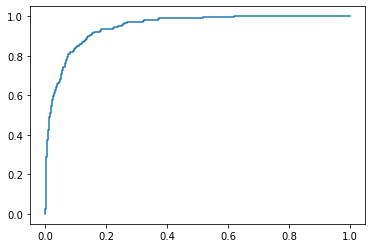

In [20]:
fpr, tpr, thresholds=roc_curve(y,pred1[:,1])  # fpr: x축(false positive rate: 1-specificity)
# tpr: y축 (true positive rate: sensitivity)
plt.plot(fpr, tpr) 
plt.show()

In [21]:
roc_auc_score(y,pred1[:,1])

0.9479784946837808

In [22]:
# 1-specificity = false positive rate
42/(9625+42)

0.004344677769732078

In [ ]:
# In-sample prediction 
# out-of-sample prediction 

In [23]:
x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.7, random_state=0)

In [ ]:
# Logistic regression with train set 
# Prediction with test set (3000개에 대해서 CCR을 계산한다)

In [29]:
file2="c:/temp100/smarket.csv"
smarket=pd.read_csv(file2, index_col='Year', parse_dates=True)
smarket

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...
2005-01-01,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
2005-01-01,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
2005-01-01,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up


In [30]:
# 시계열 데이터를 불러올 때는 time variable이 index column 되도록 지정해야 한다. 
smarket.index=smarket.index.year
smarket

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...
2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up


In [45]:
# 2001- 2004년 train, 2005년 test 
train_set=smarket[smarket.index<=2004]
test_set=smarket[smarket.index>=2005]

In [42]:
train_set=smarket.loc[:2004]
test_set=smarket.loc[2005:]

In [46]:
test_set

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2005,-0.134,0.008,-0.007,0.715,-0.431,0.78690,-0.812,Down
2005,-0.812,-0.134,0.008,-0.007,0.715,1.51080,-1.167,Down
2005,-1.167,-0.812,-0.134,0.008,-0.007,1.72100,-0.363,Down
2005,-0.363,-1.167,-0.812,-0.134,0.008,1.73890,0.351,Up
2005,0.351,-0.363,-1.167,-0.812,-0.134,1.56910,-0.143,Down
...,...,...,...,...,...,...,...,...
2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up


In [47]:
# totamo: (sweet=6, crunch=4), green bean (sweet=3. crunch=7)
np.sqrt((6-3)**2+(4-7)**2)  # distance between totamto and green bean 

4.242640687119285

In [48]:
x=[10, 15, 20, 70, 90]
x

[10, 15, 20, 70, 90]

In [51]:
np.mean(x)

41.0

In [58]:
np.sqrt(np.var(x)) 
np.std(x)  

32.61901286060018

In [56]:
x_stan=(x-np.mean(x))/np.sqrt(np.var(x))

In [57]:
x_stan

array([-0.95036598, -0.79708114, -0.64379631,  0.88905204,  1.50219138])

In [59]:
np.max(x)

90

In [60]:
np.min(x)

10

In [61]:
(x-np.min(x))/(np.max(x)-np.min(x))

array([0.    , 0.0625, 0.125 , 0.75  , 1.    ])